# Zadanie domowe -- interpolacja dwusześcienna

Interpolacja dwusześcienna, to podobnie jak w przypadku interpolacji dwuliniowej, rozszerzenie idei interpolacji jednowymiarowej na dwuwymiarową siatkę.
W trakcie jej obliczania wykorzystywane jest 16 pikseli z otoczenia (dla dwuliniowej 4).
Skutkuje to zwykle lepszymi wynikami - obraz wyjściowy jest bardziej gładki i z mniejszą liczbą artefaktów.
Ceną jest znaczny wzrost złożoności obliczeniowej (zostało to zaobserwowane podczas ćwiczenia).

Interpolacja dana jest wzorem:
\begin{equation}
I(i,j) = \sum_{i=0}^{3} \sum_{j=0}^{3} a_{ij} x^i y^j
\end{equation}

Zadanie sprowadza się zatem do wyznaczenia 16 współczynników $a_{ij}$.
W tym celu wykorzystuje się, oprócz wartość w puntach $A$ (0,0), $B$ (1 0), $C$ (1,1), $D$ (0,1) (por. rysunek dotyczący interpolacji dwuliniowej), także pochodne cząstkowe $A_x$, $A_y$, $A_{xy}$.
Pozwala to rozwiązać układ 16-tu równań.

Jeśli zgrupujemy parametry $a_{ij}$:
\begin{equation}
a = [ a_{00}~a_{10}~a_{20}~a_{30}~a_{01}~a_{11}~a_{21}~a_{31}~a_{02}~a_{12}~a_{22}~a_{32}~a_{03}~a_{13}~a_{23}~a_{33}]
\end{equation}

i przyjmiemy:
\begin{equation}
x = [A~B~D~C~A_x~B_x~D_x~C_x~A_y~B_y~D_y~C_y~A_{xy}~B_{xy}~D_{xy}~C_{xy}]^T
\end{equation}

To zagadnienie można opisać w postaci równania liniowego:
\begin{equation}
Aa = x
\end{equation}
gdzie macierz $A^{-1}$ dana jest wzorem:

\begin{equation}
A^{-1} =
\begin{bmatrix}
1& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0 \\
0&  0&  0&  0&  1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
-3&  3&  0&  0& -2& -1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
2& -2&  0&  0&  1&  1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  1&  0&  0&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  1&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0& -3&  3&  0&  0& -2& -1&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  2& -2&  0&  0&  1&  1&  0&  0 \\
-3&  0&  3&  0&  0&  0&  0&  0& -2&  0& -1&  0&  0&  0&  0&  0 \\
0&  0&  0&  0& -3&  0&  3&  0&  0&  0&  0&  0& -2&  0& -1&  0 \\
9& -9& -9&  9&  6&  3& -6& -3&  6& -6&  3& -3&  4&  2&  2&  1 \\
-6&  6&  6& -6& -3& -3&  3&  3& -4&  4& -2&  2& -2& -2& -1& -1 \\
2&  0& -2&  0&  0&  0&  0&  0&  1&  0&  1&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  2&  0& -2&  0&  0&  0&  0&  0&  1&  0&  1&  0 \\
-6&  6&  6& -6& -4& -2&  4&  2& -3&  3& -3&  3& -2& -1& -2& -1 \\
4& -4& -4&  4&  2&  2& -2& -2&  2& -2&  2& -2&  1&  1&  1&  1 \\
\end{bmatrix}
\end{equation}

Potrzebne w rozważaniach pochodne cząstkowe obliczane są wg. następującego przybliżenia (przykład dla punktu A):
\begin{equation}
A_x = \frac{I(i+1,j) - I(i-1,j)}{2}
\end{equation}
\begin{equation}
A_y = \frac{I(i,j+1) - I(i,j-1)}{2}
\end{equation}
\begin{equation}
A_{xy} = \frac{I(i+1,j+1) - I(i-1,j) - I(i,j-1) + I(i,j)}{4}
\end{equation}

## Zadanie

Wykorzystując podane informacje zaimplementuj interpolację dwusześcienną.
Uwagi:
- macierz $A^{-1}$ dostępna jest w pliku *a_invert.py*
- trzeba się zastanowić nad potencjalnym wykraczaniem poza zakres obrazka (jak zwykle).

Ponadto dokonaj porównania liczby operacji arytmetycznych i dostępów do pamięci koniecznych przy realizacji obu metod interpolacji: dwuliniowej i dwusześciennej.

In [ ]:
import cv2
import os
import requests
from matplotlib import pyplot as plt
import numpy as np

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/05_Resolution/'

fileName = "ainvert.py"
if not os.path.exists(fileName):
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

import ainvert

In [ ]:
def Ax(I, i, j):
    try:
        return (int(I[i, j + 1]) - int(I[i, j - 1])) / 2
    except IndexError:
        return 0
    
def Ay(I, i, j):
    try:
        return (int(I[i + 1, j]) - int(I[i - 1, j])) / 2
    except IndexError:
        return 0
            
def Axy(I, i, j):
    try:
        return (int(I[i + 1, j + 1]) - int(I[i - 1, j]) - int(I[i, j - 1]) + int(I[i, j])) / 4
    except IndexError:
        return 0

def resize_cubic(I, scale_x, scale_y):
    new_height, new_width = round(I.shape[0] * scale_x), round(I.shape[1] * scale_y)
    result = np.zeros((new_height, new_width))
    for i in range(new_height):
        for j in range(new_width):
            A = (int(i / scale_x), int(j / scale_y))
            B = (min(A[0], I.shape[0] - 1), min(A[1] + 1, I.shape[1] - 1))
            C = (min(A[0] + 1, I.shape[0] - 1), min(A[1] + 1, I.shape[1] - 1))
            D = (min(A[0] + 1, I.shape[0] - 1), min(A[1], I.shape[1] - 1))

            x_ratio = i / scale_x - A[0]
            y_ratio = j / scale_y - A[1]

            x = np.array([I[A[0], A[1]], I[B[0], B[1]], I[D[0], D[1]], I[C[0], C[1]],
                          Ax(I, A[0], A[1]), Ax(I, B[0], B[1]), Ax(I, D[0], D[1]), Ax(I, C[0], C[1]),
                          Ay(I, A[0], A[1]), Ay(I, B[0], B[1]), Ay(I, D[0], D[1]), Ay(I, C[0], C[1]),
                          Axy(I, A[0], A[1]), Axy(I, B[0], B[1]), Axy(I, D[0], D[1]), Axy(I, C[0], C[1])], dtype=np.float64)
            
            a = ainvert.A_invert @ x
            a = a.reshape((4, 4)).T

            result[i, j] = np.power(y_ratio, [0, 1, 2, 3]) @ a @ np.power(x_ratio, [0, 1, 2, 3])
    return np.clip(result, 0, 255)

In [ ]:
fileNames = ["parrot.bmp", "clock.bmp", "chessboard.bmp", "bart.png", "firetruck.jpg", "lena.bmp"]
for fileName in fileNames:
  if not os.path.exists(fileName):
      r = requests.get(url + fileName, allow_redirects=True)
      open(fileName, 'wb').write(r.content)

def show_image(I):
    plt.figure(figsize=(I.shape[0] / 100,I.shape[1] / 100), dpi=200)
    plt.imshow(I, cmap ="gray")
    plt.xticks([]), plt.yticks([])
    plt.show()

I1 = cv2.imread('parrot.bmp')
I1 = cv2.cvtColor(I1, cv2.COLOR_BGR2GRAY)

I2 = cv2.imread('clock.bmp')
I2 = cv2.cvtColor(I2, cv2.COLOR_BGR2GRAY)

I3 = cv2.imread('chessboard.bmp')
I3 = cv2.cvtColor(I3, cv2.COLOR_BGR2GRAY)

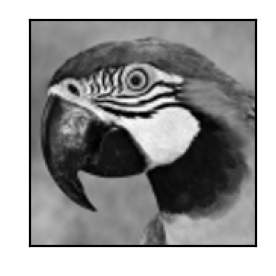

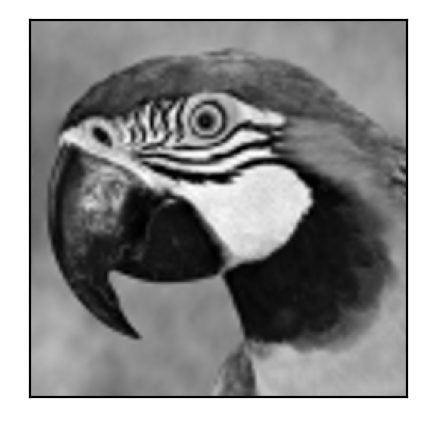

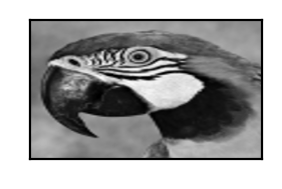

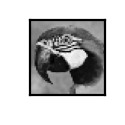

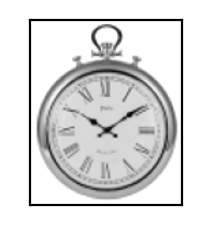

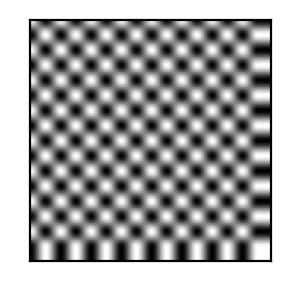

In [ ]:
show_image(resize_cubic(I1, 1.5, 1.5))
show_image(resize_cubic(I1, 2.5, 2.5))
show_image(resize_cubic(I1, 1.5, 2.5))
show_image(resize_cubic(I1, 0.5, 0.5))
show_image(resize_cubic(I2, 1.5, 1.5))
show_image(resize_cubic(I3, 10, 10))